# Lista de Exercícios + Prova - MAC0459 Ciência e Engenharia de Dados

Ricardo Hideki Hangai Kojo - 10295429

## Lista de Exercícios

### Q1

Uma árvore de decisão treinada sem restrições tem uma folha por instância do _training set_. Considerando que a árvore de decisão formada é binária, temos que a profundidade aproximada é de:

log_2(10.000.000) = log_2(10^7) ≃ **23**

### Q2

_**Generally lower**_

### Q3

_**Yes**, decreasing max_depth in case of overfitting may help relieve the problem, as there may be less nodes/leaves in the Decision Tree._

### Q4

_**No**. Feature scalling is irrelevant to Decision Trees. Therefore, it scalling input features on a underfitting Decision Tree won't make any difference._

### Q5

A complexidade de treinar uma _Decision Tree_ é O(n * m log(m)).

Multiplicando por 10, temos:

```
K = (n * 10m * log(10m)) / (n * m * log(m))
  = 10log(10m) / log(m)
  = 10log(10^8) / log(10^7)
  ≃ 11.4285
```

Logo, temos que a quantidade de horas para treinar outra _Decision Tree_ com um _training set_ similar de 10mi instâncias é de aproximadamente **11.42 horas**

### Q6

## Prova

### Q1

O _dataset_ é **Dados Estatísticos do Transporte Aéreo** é um conjunto de dados disponibilizado e mantido pela ANAC (Agência Nacional de Aviação Civil) que contém dados sobre o transporte aéreo no Brasil, incluindo voos domésticos e internacionais, regulares ou não, e com dados sobre passageiros, distância, bagagem, combustível, entre outros. Os dados são atualizados mensalmente e possuem registros de voos a partir do ano 2000.

Seguem as questões a serem respondidas pela EDA:

1. **Qual o ano com maior quantidade de voos?**
2. **Qual o mês do ano com maior quantidade de voos?**
3. **Qual a relação entre a distância e os outros campos do dataset?**

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn

In [6]:
flights2 = pd.read_csv("/home/kojo/Documentos/MAC0459-2019/dados-estatisticos.csv", sep=";", encoding='latin-1')

In [7]:
flights2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887384 entries, 0 to 887383
Data columns (total 38 columns):
EMPRESA (SIGLA)                                       887384 non-null object
EMPRESA (NOME)                                        887384 non-null object
EMPRESA (NACIONALIDADE)                               887384 non-null object
ANO                                                   887384 non-null int64
MÊS                                                   887384 non-null int64
AEROPORTO DE ORIGEM (SIGLA)                           887384 non-null object
AEROPORTO DE ORIGEM (NOME)                            887370 non-null object
AEROPORTO DE ORIGEM (UF)                              772870 non-null object
AEROPORTO DE ORIGEM (REGIÃO)                          772876 non-null object
AEROPORTO DE ORIGEM (PAÍS)                            887370 non-null object
AEROPORTO DE ORIGEM (CONTINENTE)                      887370 non-null object
AEROPORTO DE DESTINO (SIGLA)                

In [8]:
flights2.head()

,EMPRESA (SIGLA),EMPRESA (NOME),EMPRESA (NACIONALIDADE),ANO,MÊS,AEROPORTO DE ORIGEM (SIGLA),AEROPORTO DE ORIGEM (NOME),AEROPORTO DE ORIGEM (UF),AEROPORTO DE ORIGEM (REGIÃO),AEROPORTO DE ORIGEM (PAÍS),...,COMBUSTÍVEL (LITROS) - APENAS EMPRESAS BRASILEIRAS,DISTÂNCIA VOADA (KM),DECOLAGENS,CARGA PAGA KM,CARGA GRATIS KM,CORREIO KM,ASSENTOS,PAYLOAD,HORAS VOADAS,BAGAGEM (KG)
0,AAL,AMERICAN AIRLINES,ESTRANGEIRA,2000,1,SBGR,SÃO PAULO - GUARULHOS,SP,SUDESTE,BRASIL,...,NaN,"254975,00","31,00","1407387975,00","0,00","148050,00","6541,00","1085000,00",NaN,NaN
1,AAL,AMERICAN AIRLINES,ESTRANGEIRA,2000,1,SBGR,SÃO PAULO - GUARULHOS,SP,SUDESTE,BRASIL,...,NaN,"221444,00","29,00","2327521524,00","0,00","84385436,00","6119,00","1015000,00",NaN,NaN
2,AAL,AMERICAN AIRLINES,ESTRANGEIRA,2000,1,SBGR,SÃO PAULO - GUARULHOS,SP,SUDESTE,BRASIL,...,NaN,"419392,00","64,00","5257408943,00","0,00","39593361,00","13504,00","2240000,00",NaN,NaN
3,AAL,AMERICAN AIRLINES,ESTRANGEIRA,2000,1,SBGR,SÃO PAULO - GUARULHOS,SP,SUDESTE,BRASIL,...,NaN,"35247,00","31,00","54662412,00","0,00","758379,00","6541,00","837000,00",NaN,NaN
4,AAL,AMERICAN AIRLINES,ESTRANGEIRA,2000,1,SBGR,SÃO PAULO - GUARULHOS,SP,SUDESTE,BRASIL,...,NaN,"47010,00","30,00","100151671,00","0,00","3301669,00","6330,00","1053001,00",NaN,NaN


In [9]:
flights2.tail()

,EMPRESA (SIGLA),EMPRESA (NOME),EMPRESA (NACIONALIDADE),ANO,MÊS,AEROPORTO DE ORIGEM (SIGLA),AEROPORTO DE ORIGEM (NOME),AEROPORTO DE ORIGEM (UF),AEROPORTO DE ORIGEM (REGIÃO),AEROPORTO DE ORIGEM (PAÍS),...,COMBUSTÍVEL (LITROS) - APENAS EMPRESAS BRASILEIRAS,DISTÂNCIA VOADA (KM),DECOLAGENS,CARGA PAGA KM,CARGA GRATIS KM,CORREIO KM,ASSENTOS,PAYLOAD,HORAS VOADAS,BAGAGEM (KG)
887379,VDA,VOLGA DNEPR,ESTRANGEIRA,2019,7,SBKP,CAMPINAS,SP,SUDESTE,BRASIL,...,NaN,"0,00","0,00","683648000,00","0,00","0,00","0,00","0,00",NaN,NaN
887380,VDA,VOLGA DNEPR,ESTRANGEIRA,2019,8,GVAC,ILHA DO SAL,NaN,NaN,CABO VERDE,...,NaN,"4577,00","1,00","0,00","0,00","0,00","0,00","120000,00",NaN,NaN
887381,VDA,VOLGA DNEPR,ESTRANGEIRA,2019,8,MMGL,GUADALAJARA/INTL,NaN,NaN,MÉXICO,...,NaN,"8182,00","1,00","0,00","0,00","0,00","0,00","120000,00",NaN,NaN
887382,VDA,VOLGA DNEPR,ESTRANGEIRA,2019,8,SBKP,CAMPINAS,SP,SUDESTE,BRASIL,...,NaN,"0,00","0,00","541200000,00","0,00","0,00","0,00","0,00",NaN,NaN
887383,VDA,VOLGA DNEPR,ESTRANGEIRA,2019,8,SBKP,CAMPINAS,SP,SUDESTE,BRASIL,...,NaN,"5263,00","1,00","0,00","0,00","0,00","0,00","120000,00",NaN,NaN


#### 1. **Qual o ano com maior quantidade de voos?**

In [36]:
max_flights_by_year =  flights2['ANO'].value_counts().max()
max_flights_by_year

58228

In [21]:
flights_per_year =  flights2['ANO'].value_counts().sort_index()
flights_per_year

2000    48334
2001    48437
2002    47098
2003    39520
2004    39955
2005    40786
2006    53207
2007    58228
2008    45877
2009    37685
2010    45065
2011    48112
2012    50337
2013    49792
2014    46420
2015    44233
2016    39569
2017    39501
2018    39802
2019    25426
Name: ANO, dtype: int64

In [25]:
regular_flights_per_year =  flights2[flights2['GRUPO DE VOO'] == 'Regular']['ANO'].value_counts().sort_index()
regular_flights_per_year

2000    31871
2001    30997
2002    30279
2003    25746
2004    26477
2005    28076
2006    33967
2007    37124
2008    33496
2009    27127
2010    30625
2011    35965
2012    35214
2013    34042
2014    30076
2015    30785
2016    26473
2017    25439
2018    27446
2019    17304
Name: ANO, dtype: int64

In [31]:
non_regular_flights_per_year =  flights2[flights2['GRUPO DE VOO'] == 'Não-regular']['ANO'].value_counts().sort_index()
non_regular_flights_per_year

2000    12949
2001    13987
2002    13691
2003    11100
2004    10622
2005    10195
2006    16239
2007    17027
2008     9365
2009     7802
2010    10661
2011     8179
2012    10463
2013    10710
2014    11774
2015     9312
2016     9458
2017    10505
2018     8537
2019     5517
Name: ANO, dtype: int64

In [32]:
improductive_flights_per_year =  flights2[flights2['GRUPO DE VOO'] == 'Improdutivo']['ANO'].value_counts().sort_index()
improductive_flights_per_year

2000    3514
2001    3453
2002    3128
2003    2674
2004    2848
2005    2515
2006    3000
2007    4073
2008    3016
2009    2756
2010    3779
2011    3968
2012    4660
2013    5040
2014    4570
2015    4136
2016    3638
2017    3557
2018    3819
2019    2605
Name: ANO, dtype: int64

In [34]:
domestic_flights_per_year =  flights2[flights2['NATUREZA'] == 'Doméstica']['ANO'].value_counts().sort_index()
domestic_flights_per_year

2000    40903
2001    41156
2002    39643
2003    31351
2004    30870
2005    31983
2006    42509
2007    47030
2008    36650
2009    30400
2010    34917
2011    37073
2012    37182
2013    36812
2014    32751
2015    31640
2016    27343
2017    27629
2018    27239
2019    17511
Name: ANO, dtype: int64

In [35]:
international_flights_per_year =  flights2[flights2['NATUREZA'] == 'Internacional']['ANO'].value_counts().sort_index()
international_flights_per_year

2000     7431
2001     7281
2002     7455
2003     8169
2004     9085
2005     8803
2006    10698
2007    11198
2008     9227
2009     7285
2010    10148
2011    11039
2012    13155
2013    12980
2014    13669
2015    12593
2016    12226
2017    11872
2018    12563
2019     7915
Name: ANO, dtype: int64

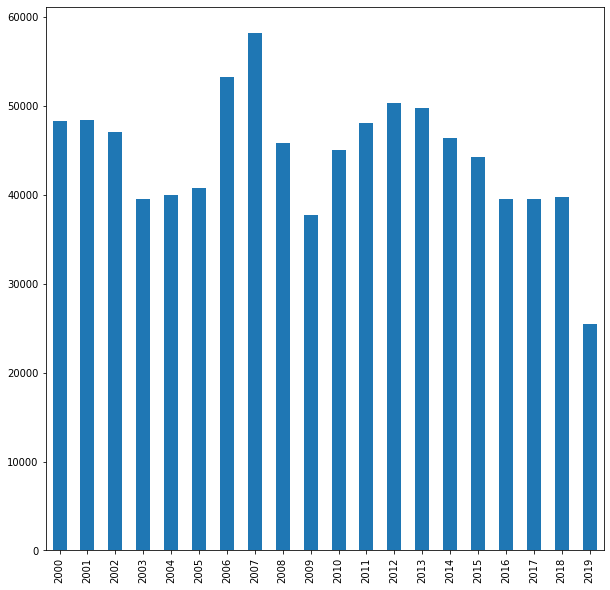

In [22]:
flights_per_year.plot.bar(figsize=(10,10))

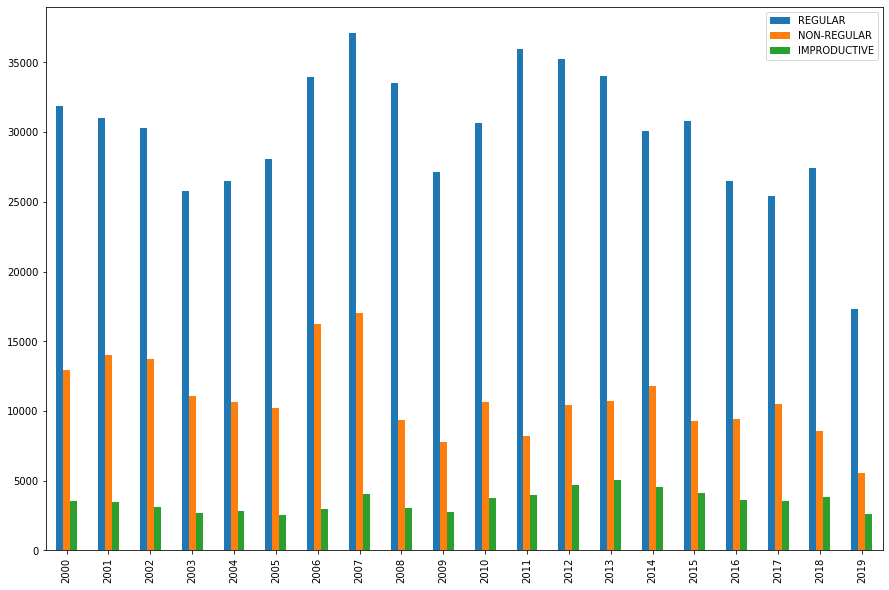

In [42]:
flights_by_group = pd.DataFrame({'REGULAR': regular_flights_per_year,
                                 'NON-REGULAR': non_regular_flights_per_year,
                                 'IMPRODUCTIVE': improductive_flights_per_year
                                }, index=[i for i in range(2000, 2020)])
flights_by_group.plot.bar(figsize=(15,10))

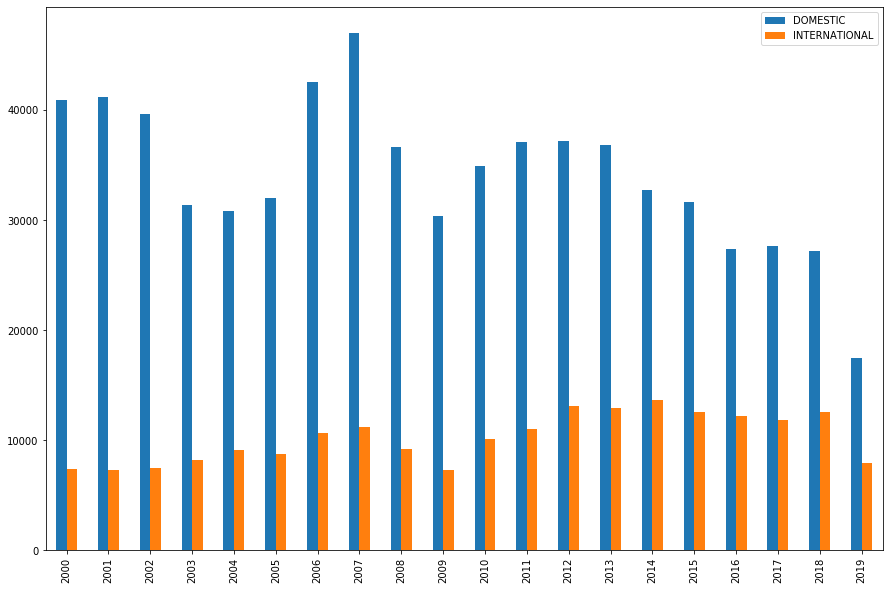

In [43]:
flights_by_nature = pd.DataFrame({'DOMESTIC': domestic_flights_per_year,
                                 'INTERNATIONAL': international_flights_per_year,
                                }, index=[i for i in range(2000, 2020)])
flights_by_nature.plot.bar(figsize=(15,10))

#### 2. Qual o mês do ano com maior quantidade de voos?

In [44]:
max_flights_by_month =  flights2['MÊS'].value_counts().max()
max_flights_by_month

81632

In [45]:
flights_per_month =  flights2['MÊS'].value_counts().sort_index()
flights_per_month

1     81632
2     78402
3     72946
4     73858
5     69708
6     72494
7     79137
8     72897
9     67886
10    70418
11    68749
12    79257
Name: MÊS, dtype: int64

In [46]:
regular_flights_per_month =  flights2[flights2['GRUPO DE VOO'] == 'Regular']['MÊS'].value_counts().sort_index()
regular_flights_per_month

1     53710
2     53062
3     49799
4     51586
5     48638
6     48841
7     52928
8     51016
9     46374
10    46183
11    45969
12    50423
Name: MÊS, dtype: int64

#### 3. Qual a relação entre a distância e os outros campos do dataset?

In [61]:
flights2['PASSAGEIROS PAGOS'] = [str(x).replace(',', '.') for x in flights2['PASSAGEIROS PAGOS']]
flights2['PASSAGEIROS GRÁTIS'] = [str(x).replace(',', '.') for x in flights2['PASSAGEIROS GRÁTIS']]
flights2['CARGA PAGA (KG)'] = [str(x).replace(',', '.') for x in flights2['CARGA PAGA (KG)']]
flights2['CARGA GRÁTIS (KG)'] = [str(x).replace(',', '.') for x in flights2['CARGA GRÁTIS (KG)']]
flights2['CORREIO (KG)'] = [str(x).replace(',', '.') for x in flights2['CORREIO (KG)']]
flights2['ASK'] = [str(x).replace(',', '.') for x in flights2['ASK']]
flights2['RPK'] = [str(x).replace(',', '.') for x in flights2['RPK']]
flights2['ATK'] = [str(x).replace(',', '.') for x in flights2['ATK']]
flights2['RTK'] = [str(x).replace(',', '.') for x in flights2['RTK']]
flights2['COMBUSTÍVEL (LITROS) - APENAS EMPRESAS BRASILEIRAS'] = [str(x).replace(',', '.') for x in flights2['COMBUSTÍVEL (LITROS) - APENAS EMPRESAS BRASILEIRAS']]
flights2['DISTÂNCIA VOADA (KM)'] = [str(x).replace(',', '.') for x in flights2['DISTÂNCIA VOADA (KM)']]
flights2['DECOLAGENS'] = [str(x).replace(',', '.') for x in flights2['DECOLAGENS']]
flights2['CARGA PAGA KM'] = [str(x).replace(',', '.') for x in flights2['CARGA PAGA KM']]
flights2['CARGA GRATIS KM'] = [str(x).replace(',', '.') for x in flights2['CARGA GRATIS KM']]
flights2['CORREIO KM'] = [str(x).replace(',', '.') for x in flights2['CORREIO KM']]
flights2['ASSENTOS'] = [str(x).replace(',', '.') for x in flights2['ASSENTOS']]
flights2['PAYLOAD'] = [str(x).replace(',', '.') for x in flights2['PAYLOAD']]
flights2['HORAS VOADAS'] = [str(x).replace(',', '.') for x in flights2['HORAS VOADAS']]
flights2['BAGAGEM (KG)'] = [str(x).replace(',', '.') for x in flights2['BAGAGEM (KG)']]

In [62]:
flights2['PASSAGEIROS PAGOS'] = pd.to_numeric(flights2['PASSAGEIROS PAGOS'], errors="coerce")
flights2['PASSAGEIROS GRÁTIS'] = pd.to_numeric(flights2['PASSAGEIROS GRÁTIS'], errors="coerce")
flights2['CARGA PAGA (KG)'] = pd.to_numeric(flights2['CARGA PAGA (KG)'], errors="coerce")
flights2['CARGA GRÁTIS (KG)'] = pd.to_numeric(flights2['CARGA GRÁTIS (KG)'], errors="coerce")
flights2['CORREIO (KG)'] = pd.to_numeric(flights2['CORREIO (KG)'], errors="coerce")
flights2['ASK'] = pd.to_numeric(flights2['ASK'], errors="coerce")
flights2['RPK'] = pd.to_numeric(flights2['RPK'], errors="coerce")
flights2['ATK'] = pd.to_numeric(flights2['ATK'], errors="coerce")
flights2['RTK'] = pd.to_numeric(flights2['RTK'], errors="coerce")
flights2['COMBUSTÍVEL (LITROS) - APENAS EMPRESAS BRASILEIRAS'] = pd.to_numeric(flights2['COMBUSTÍVEL (LITROS) - APENAS EMPRESAS BRASILEIRAS'], errors="coerce")
flights2['DISTÂNCIA VOADA (KM)'] = pd.to_numeric(flights2['DISTÂNCIA VOADA (KM)'], errors="coerce")
flights2['DECOLAGENS'] = pd.to_numeric(flights2['DECOLAGENS'], errors="coerce")
flights2['CARGA PAGA KM'] = pd.to_numeric(flights2['CARGA PAGA KM'], errors="coerce")
flights2['CARGA GRATIS KM'] = pd.to_numeric(flights2['CARGA GRATIS KM'], errors="coerce")
flights2['CORREIO KM'] = pd.to_numeric(flights2['CORREIO KM'], errors="coerce")
flights2['ASSENTOS'] = pd.to_numeric(flights2['ASSENTOS'], errors="coerce")
flights2['PAYLOAD'] = pd.to_numeric(flights2['PAYLOAD'], errors="coerce")
flights2['HORAS VOADAS'] = pd.to_numeric(flights2['HORAS VOADAS'], errors="coerce")
flights2['BAGAGEM (KG)'] = pd.to_numeric(flights2['BAGAGEM (KG)'], errors="coerce")
flights2.corr()

,ANO,MÊS,PASSAGEIROS PAGOS,PASSAGEIROS GRÁTIS,CARGA PAGA (KG),CARGA GRÁTIS (KG),CORREIO (KG),ASK,RPK,ATK,...,COMBUSTÍVEL (LITROS) - APENAS EMPRESAS BRASILEIRAS,DISTÂNCIA VOADA (KM),DECOLAGENS,CARGA PAGA KM,CARGA GRATIS KM,CORREIO KM,ASSENTOS,PAYLOAD,HORAS VOADAS,BAGAGEM (KG)
ANO,1.000000,-0.027832,0.178962,0.064299,0.048571,-0.002096,0.008080,0.097277,0.113380,0.090151,...,0.067464,0.092631,0.043765,0.033316,-0.002076,0.010471,0.090527,0.099847,0.124757,0.182556
MÊS,-0.027832,1.000000,0.005634,0.002010,0.014040,-0.003285,0.007424,-0.000462,-0.000084,0.002490,...,0.001536,-0.000047,0.000690,0.007299,0.001937,0.007078,0.001319,0.005220,0.002860,0.003240
PASSAGEIROS PAGOS,0.178962,0.005634,1.000000,0.739057,0.207369,0.058440,-0.016504,0.515619,0.505646,0.359856,...,0.612228,0.622348,0.897400,0.074890,0.003343,0.036871,0.951763,0.899307,0.845634,0.892379
PASSAGEIROS GRÁTIS,0.064299,0.002010,0.739057,1.000000,0.146248,0.073490,-0.006504,0.324259,0.295695,0.226132,...,0.470909,0.418500,0.753361,0.040145,0.003414,0.026971,0.764259,0.719986,0.648224,0.640918
CARGA PAGA (KG),0.048571,0.014040,0.207369,0.146248,1.000000,0.028394,0.034519,0.389919,0.398138,0.492711,...,0.442970,0.428789,0.111143,0.664416,0.011475,0.123339,0.157200,0.295065,0.350027,0.311054
CARGA GRÁTIS (KG),-0.002096,-0.003285,0.058440,0.073490,0.028394,1.000000,0.005542,0.033851,0.032588,0.029954,...,0.037751,0.042738,0.055435,0.024509,0.095619,0.012489,0.058936,0.061227,0.051723,0.051307
CORREIO (KG),0.008080,0.007424,-0.016504,-0.006504,0.034519,0.005542,1.000000,0.026277,0.028711,0.044173,...,0.018615,0.030879,-0.002251,0.020734,0.001126,0.669219,-0.028504,0.035832,-0.009524,-0.029322
ASK,0.097277,-0.000462,0.515619,0.324259,0.389919,0.033851,0.026277,1.000000,0.965267,0.880021,...,0.956632,0.934162,0.331572,0.364301,0.012700,0.248653,0.469059,0.535754,0.862931,0.758843
RPK,0.113380,-0.000084,0.505646,0.295695,0.398138,0.032588,0.028711,0.965267,1.000000,0.853162,...,0.934988,0.910278,0.296761,0.381633,0.013789,0.258199,0.430710,0.498544,0.827009,0.746032
ATK,0.090151,0.002490,0.359856,0.226132,0.492711,0.029954,0.044173,0.880021,0.853162,1.000000,...,0.946827,0.838399,0.204972,0.460596,0.010991,0.260654,0.317531,0.488900,0.754865,0.635395


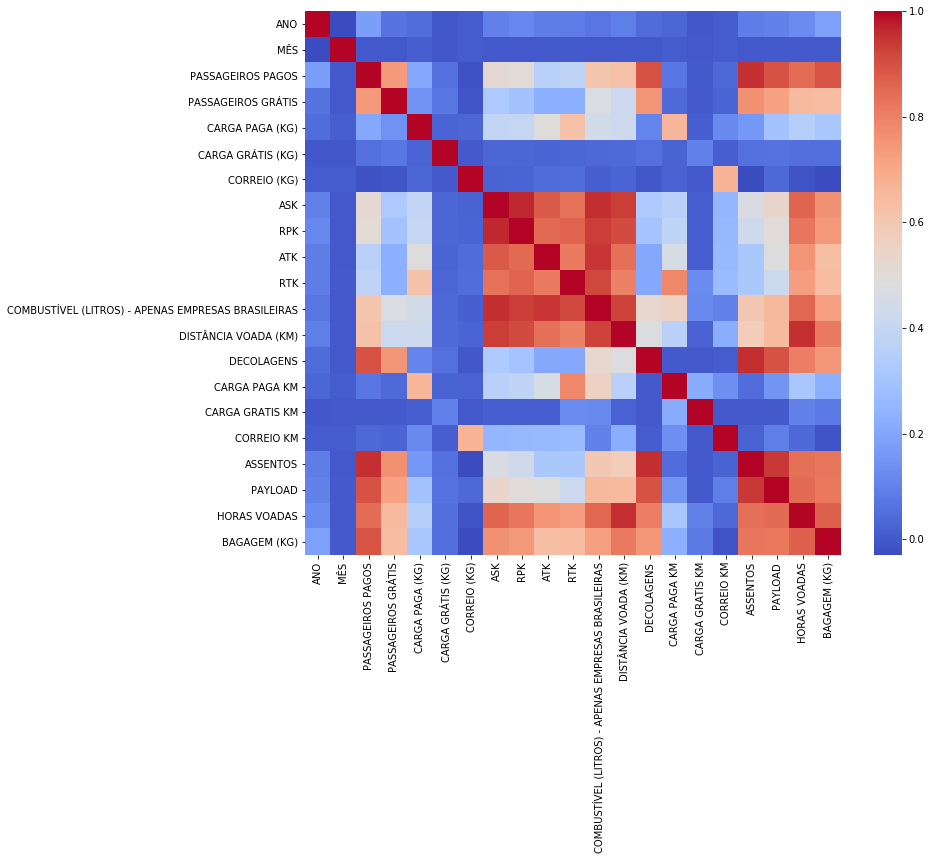

In [66]:
plt.figure(figsize = (12,10))
seaborn.heatmap(flights2.corr(), cmap='coolwarm')

### Q2

### Q3

### Q4

### Q5

### Q6

#### Favoritismos `#37`: veja quais equipes têm mais chances de vencer na rodada do Brasileirão via Numerólogos do Globoesporte - Exemplo Ruim

https://globoesporte.globo.com/numerologos/noticia/favoritismos-37-veja-quais-equipes-tem-mais-chances-de-vencer-na-rodada-do-brasileirao.ghtml

Este é um exemplo ruim de apresentação de dados estatísticos relacionados à 37ª rodada do Campeonato Brasileiro de futebol, no qual há uma imagem para cada jogo da rodada.

Os dados apresentados não aparentam ser viesados.

Os pontos negativos se mostram em como os dados estão distribuídos na imagem. Há uma lupa com uma porcentagem, sem uma legenda para explicitar o que ela significa. Assume-se que seja a porcentagem de aproveitamento do clube. Além disso, os gráficos tem marcações confusas para o eixo Y, e o eixo X nem possui marcações. A ordem dos gráficos é invertida entre os times, sendo difícil de compará-los. Em geral, é difícil de visualizar e entender os números mostrados.

São usadas muitas cores. É possível diferenciar cada uma das partes que querem ser mostradas, apesar de ser difícil de entender os dados em si.

Uma forma de melhorar os dados mostrados seria reogrnizar a forma como são mostrados, pois não há necessidade em espalhá-los pela imagem. Segue uma lista de sugestões:
  * organizar os dados verticalmente;
  * usar a mesma ordem para os dois times;
  * refazer os gráficos adicionando título, _labels_ e marcações para os dois eixos;
  * adicionar legendas para as porcentagens mopstradas;
  * alterar cores.
  
#### Quem são as principais vítimas de homicídio no Brasil via Nexo Jornal - Exemplo Bom

https://www.nexojornal.com.br/grafico/2019/11/19/Quem-s%C3%A3o-as-principais-v%C3%ADtimas-de-homic%C3%ADdio-no-Brasil



### Q7

### Q10 

1. Não, não assisti todas as aulas presenciais. A maioria das faltas ocorreu devido ao meu estágio e outros compromissos. Quando eu tinha algum compromisso pessoal que tomava tempo do estágio - como uma consulta médica, por exemplo - eu precisava compensar esse tempo em outro dia. Por isso, tive que sacrificar a presença em algumas aulas (dessa e de outras disciplinas);
2. Sinto que consegui entender a ideia geral e os conceitos básicos passados. No entanto, não consegui me aprofundar muito nos detalhes, muitas vezes por falta de conhecimento;
3. Sim, participei da discussão de perguntas dos _datasets_ e apresentação da EDA do meu grupo. Considero que minha participação foi boa - sinto que consegui trazer _insights_ interessantes;
4. Procurei por alguns datasets de assuntos que me interessavam - como futebol, por exemplo - para tentar fazer uma EDA sobre um assunto com o qual eu tinha mais intimidade. Não cheguei a me aprofundar nas técnicas de EDA passadas em sala, nem em bibliotecas como o Seaborn, mas foi uma tarefa divertida de se realizar;
5. Devido ao estágio (de 30h semanais) eu possuía pouco tempo para estudar durante a semana: aproximadamente 1 hora de estudos por dia, sem contar os fins de semana. Além desta disciplina, eu peguei outras 4 neste semestre, sendo que o tempo que dediquei para cada uma delas foi proporcionalmente igual - aproximadamente 2 horas semanais;
6. Acho que o conteúdo da aula em si era interessante, mas havia motivos extra-aula que desmotivam a presença, como: a sala de aula (disposição das cadeiras é ruim, espaço ruim, acústica ruim, sem ar condicionado e com ventiladores muito barulhentos), horário (qualquer aula às 8h da manhã é desmotivadora);
7. Sim, acho que satisfez. Eu não tinha nenhuma espectativa específica para esta disciplina e achei interessante tanto os trabalhos, quanto discussões/apresentações e ver sobre bibliotecas como Pandas e até sobre Spark;
8. Não há nenhum tópico específico que eu queria ter visto. No entanto, sobre os tópicos apresentados em aula,acho que os tópicos sobre clusterização e tipos de plots foram passados de forma muito rápida. Foi difícil entender tanto o conceito de clusterização quanto vantagens/desvantagens de cada tipo de plot.
9. Sim, acho que a quantidade e dificuldade das tarefas foi adequada. Me sinto seguro de continuar estudando sozinho, apesar de que eu teria que revisar/aprofundar alguns conceitos estatísticos/matemáticos. Não tenho nenhuma sugestão para melhorar as tarefas. Fazendo uma análise dos métodos de avaliação passados durante o semestre:
    - **Questões em sala**: achei as questões justas. Eram questões simples, sobre o assunto da aula (normalmente) e não havia necessidade de serem muito formais como método de avaliação;
    - **Discussão em grupos sobre os datasets**: achei uma tarefa interessante por ser diferente e por ser durante a aula;
    - **Apresentação da EDA feita em grupo**: interessante para ver não só as análises dos outros grupos, mas entender um pouco como pessoas que estão mais acostumadas com esses tipos de análise trabalham em contraste a pessoas que nunca mexeram com isso;
    - **Trabalhos individuais (EDA, lista de exercícios, prova)**: questões são justas. As avaliações não possuem uma formalidade tanto no formato de respostas quanto no tempo de entrega, o que às vezes pode causar um pouco de confusão, mas entendo que o objetivo primário é o aprendizado e não a avaliação em si.
10. Eu não possuía conhecimento anterior sobre a área, o que dificultou o entendimento de alguns dos tópicos trazidos. Não consegui dedicar tanto tempo aos estudos e nem estar presente em todas as aulas devido ao estágio. Apesar disso, acho que consegui entender os conceitos básicos, participar as atividades em grupo, fiz a apresentação da EDA e dediquei um pouco do tempo extraclasse à procurar um pouco mais sobre os assuntos vistos em sala. Sendo assim, atribuo uma **nota 8 nesta auto-avaliação**.